In [1]:
%pylab inline 
import umap
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle as pkl
import os
import plotly
import plotly.express as px
import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import matplotlib.patches as patches
from matplotlib.lines import Line2D

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
path = os.getcwd()
#data_dir = path + '/'
data_dir = path +'/umap' #Uncomment for local system

In [3]:
#model_folder = 'baseline_randomized_embeddings'
#model_name = 'Unsupervised Weighted'

#model_folder = 'baseline_semisupervised_frozen_glove'
#model_name = 'Semi-Supervised Weighted'

model_folder = 'BERT_large'
model_name = 'BERT'

#model_folder = 'LSTM_unfrozen_model'
#model_name = 'LSTM'

In [4]:
model_dir = data_dir + '/' + model_folder + '/'

# Plot embeddings on Training (0 - Blue, 1 - Orange)

In [5]:
labels = pkl.load(open(model_dir + 'labels.pickle','rb'))
embed_labelled = pkl.load(open(model_dir + 'embed_labelled.pickle','rb'))
#embed_unlabelled = pkl.load(open(model_dir + 'embed_unlabelled.pickle','rb'))

In [6]:
labels_centroids = pkl.load(open(model_dir + 'val_labels_lst.pickle','rb'))
embed_labelled_centroids = pkl.load(open(model_dir + 'val_embed_labelled.pickle','rb'))

In [7]:
reducer = umap.UMAP(n_components=2, metric='euclidean', random_state=42)
embedding = reducer.fit_transform(embed_labelled)
embedding.shape

(3640, 2)

Text(0.5, 1.0, 'UMAP Projection of BERT on Training Labelled Set')

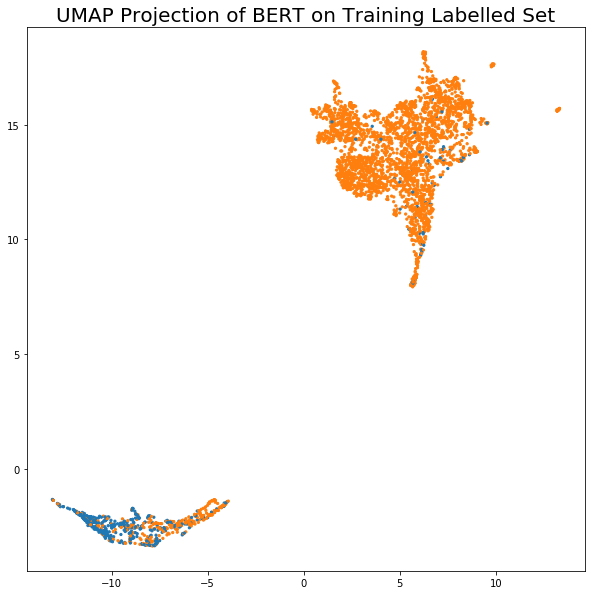

In [8]:
# For 2-dimesion
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(embedding[:,0], embedding[:,1], c=[sns.color_palette()[x] for x in labels], s=5)
plt.title('UMAP Projection of '+model_name+ ' on Training Labelled Set', fontsize=20)

In [9]:
reducer3d = umap.UMAP(n_components=3, metric='euclidean', random_state=42)
embedding3d = reducer3d.fit_transform(embed_labelled)
embedding3d.shape

(3640, 3)

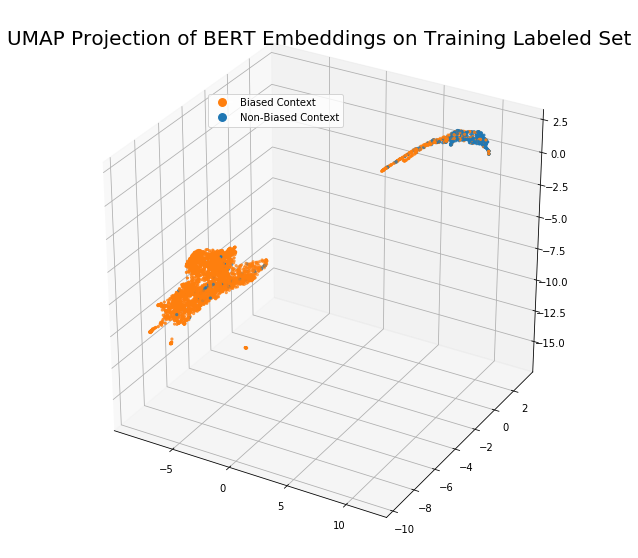

In [10]:
# For 3-dimension
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding3d[:,0], embedding3d[:,1], embedding3d[:,2], c=[sns.color_palette()[x] for x in labels], s=5)
plt.title('UMAP Projection of '+model_name+ ' Embeddings on Training Labeled Set', fontsize=20)
ax.set_xlim = 3
ax.set_ylim = 3
ax.set_zlim = 3
handles = [Line2D([0], [0], marker='o', color='w', label='Biased Context',markerfacecolor=sns.color_palette()[1], markersize=10),
           Line2D([0], [0], marker='o', color='w', label='Non-Biased Context',markerfacecolor=sns.color_palette()[0], markersize=10)]
plt.legend(handles=handles,loc=(0.3,0.78))
plt.savefig(model_dir+'umap_training')
plt.show()

# Plot embeddings on validation set with centroids

## Explore different metrics

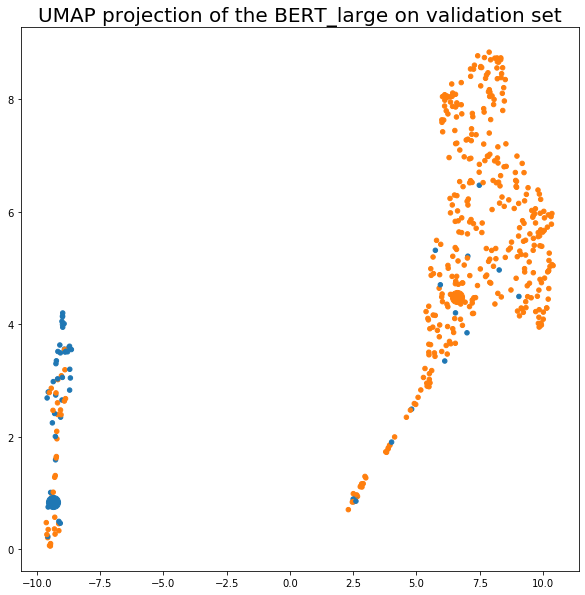

In [11]:
#With centroids
reducer4 = umap.UMAP(n_components=2, metric='euclidean', random_state=42)
embedding4 = reducer4.fit_transform(embed_labelled_centroids)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(embedding4[:-2,0], embedding4[:-2,1], c=[sns.color_palette()[x] for x in labels_centroids[:-2]], s=20)
ax.scatter(embedding4[-2,0], embedding4[-2,1], c=[sns.color_palette()[0]], s=200)
ax.scatter(embedding4[-1,0], embedding4[-1,1], c=[sns.color_palette()[1]], s=200)
plt.title('UMAP projection of the '+model_folder+ ' on validation set' , fontsize=20)
plt.show()

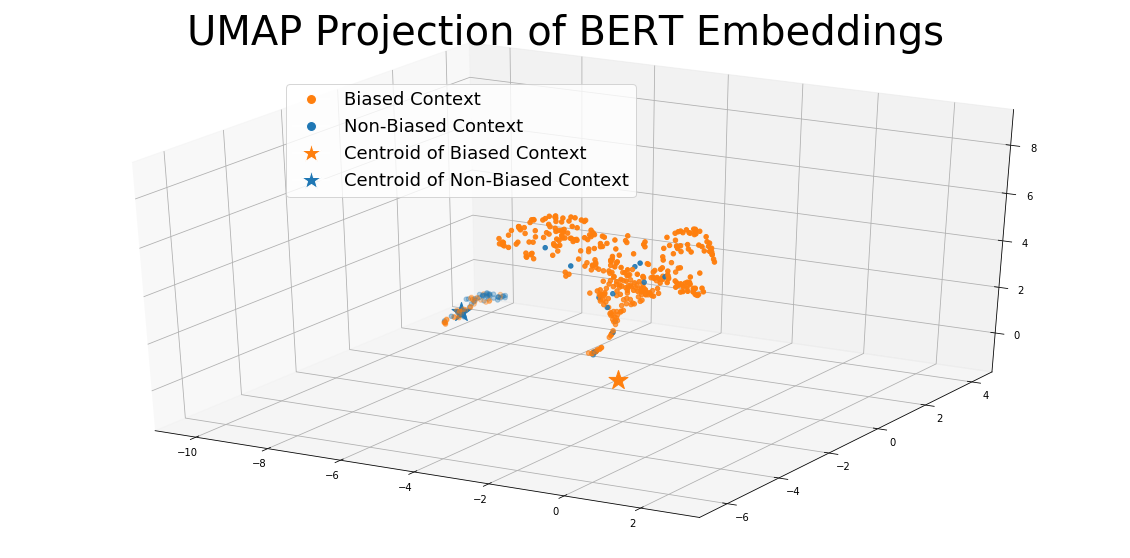

In [12]:
reducer5 = umap.UMAP(n_components=3, metric='euclidean', random_state=42)
embedding5 = reducer5.fit_transform(embed_labelled_centroids)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embedding5[:-2,0], embedding5[:-2,1], embedding5[:-2,2], c=[sns.color_palette()[x] for x in labels_centroids[:-2]], s=20)
ax.scatter(embedding5[-2,0], embedding5[-2,1], embedding5[-2,2], c=[sns.color_palette()[0]], s=400, marker='*')
ax.scatter(embedding5[-1,0], embedding5[-1,1], embedding5[-2,1], c=[sns.color_palette()[1]], s=400, marker='*')


plt.title('UMAP Projection of '+model_name+ ' Embeddings' , fontsize=40)
handles = [Line2D([0], [0], marker='o', color='w', label='Biased Context',markerfacecolor=sns.color_palette()[1], markersize=10),
           Line2D([0], [0], marker='o', color='w', label='Non-Biased Context',markerfacecolor=sns.color_palette()[0], markersize=10),
           Line2D([0], [0], marker='*', color='w', label='Centroid of Biased Context',markerfacecolor=sns.color_palette()[1], markersize=20),
           Line2D([0], [0], marker='*', color='w', label='Centroid of Non-Biased Context',markerfacecolor=sns.color_palette()[0], markersize=20),
          ]
plt.legend(handles=handles,loc=(0.25,0.65), fontsize=18)
plt.savefig(model_dir+'umap_validation')
plt.show()